In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#検査データの読み込み
inspectData = pd.read_csv("dat/inspectData.csv")
inspectData

,serial,date,current,sensitivity
0,1,5/10,32.5,100
1,2,5/10,32.4,101
2,3,5/11,32.6,102
3,4,5/11,33.3,104
4,5,5/11,33.5,105


In [3]:
#部品データの読み込み
partsData = pd.read_csv("dat/partsData.csv")
partsData

,serial,date,lot of part A,lot of part B
0,1,5/10,2001,300
1,2,5/10,2001,300
2,3,5/11,2001,301
3,4,5/11,2002,301
4,5,5/11,2002,301


In [4]:
# 検査データと部品データの統合
mergedData = pd.merge(inspectData, partsData, on = "serial")
mergedData

,serial,date_x,current,sensitivity,date_y,lot of part A,lot of part B
0,1,5/10,32.5,100,5/10,2001,300
1,2,5/10,32.4,101,5/10,2001,300
2,3,5/11,32.6,102,5/11,2001,301
3,4,5/11,33.3,104,5/11,2002,301
4,5,5/11,33.5,105,5/11,2002,301


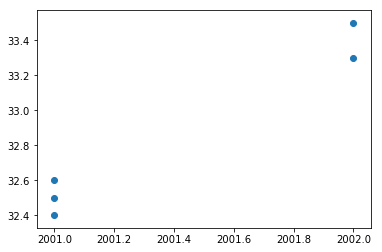

In [5]:
# 横軸をロット 縦軸をcurrentにしてプロット
plt.scatter(mergedData[ "lot of part A"], mergedData["current"])

In [6]:
#groupbyメソッドにより、部品Aのロッドごとにデータをグループ化
grouped = mergedData.groupby("lot of part A")

In [7]:
#部品データのロットごとの消費電流の平均値をもとめる
grouped.current.mean()

lot of part A
2001    32.5
2002    33.4
Name: current, dtype: float64

In [8]:
#部品データのロットごとの消費電流のばらつきをもとめる
grouped.current.std()

lot of part A
2001    0.100000
2002    0.141421
Name: current, dtype: float64